In [65]:
#Импортируем все необходимые для работы билиотеки и метрики

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

RANDOM = 42
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#Отключим предупреждения python
import warnings
warnings.filterwarnings('ignore')


****Импортируем датасеты и позднакомимся с данными****

In [66]:
df_train = pd.read_csv('train.csv')
df_train.shape

(70000, 13)

In [67]:
df_test = pd.read_csv('test.csv')
df_test.shape

(30000, 12)

In [68]:
df_train.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [69]:
df_test.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1
5,17,16712,1,160,68.0,120,80,1,1,0,0,0
6,19,15873,2,170,68.0,120,80,1,1,0,0,0
7,20,20424,1,164,60.0,120,80,1,1,0,0,0
8,22,20262,1,170,68.0,110,70,1,1,0,0,1
9,26,21737,1,162,88.0,180,100,2,2,0,1,1


In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   age          30000 non-null  int64  
 2   gender       30000 non-null  int64  
 3   height       30000 non-null  int64  
 4   weight       30000 non-null  float64
 5   ap_hi        30000 non-null  int64  
 6   ap_lo        30000 non-null  int64  
 7   cholesterol  30000 non-null  int64  
 8   gluc         30000 non-null  int64  
 9   smoke        30000 non-null  int64  
 10  alco         30000 non-null  int64  
 11  active       30000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB


In [72]:
df_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
df_test.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,50062.686900,19455.528400,1.353733,164.322267,74.120615,130.271300,95.689000,1.368033,1.222700,0.08860,0.055000,0.805733
std,28906.167148,2477.840922,0.478136,8.213740,14.341540,212.501152,163.852598,0.679166,0.566494,0.28417,0.227984,0.395642
min,5.000000,8865.000000,1.000000,50.000000,10.000000,-130.000000,-90.000000,1.000000,1.000000,0.00000,0.000000,0.000000
25%,24983.250000,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000
50%,49995.500000,19694.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000
75%,75232.250000,21320.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.00000,0.000000,1.000000
max,99997.000000,23705.000000,2.000000,198.000000,183.000000,16020.000000,9100.000000,3.000000,3.000000,1.00000,1.000000,1.000000


In [74]:
print('Количесвто дубликатов:', df_train.duplicated().sum())

Количесвто дубликатов: 0


In [75]:
print('Количесвто пропусков в датасете:', df_train.isna().sum())

Количесвто пропусков в датасете: id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


Ни пропусков, ни дубликатов нет. Визуализируем данные.

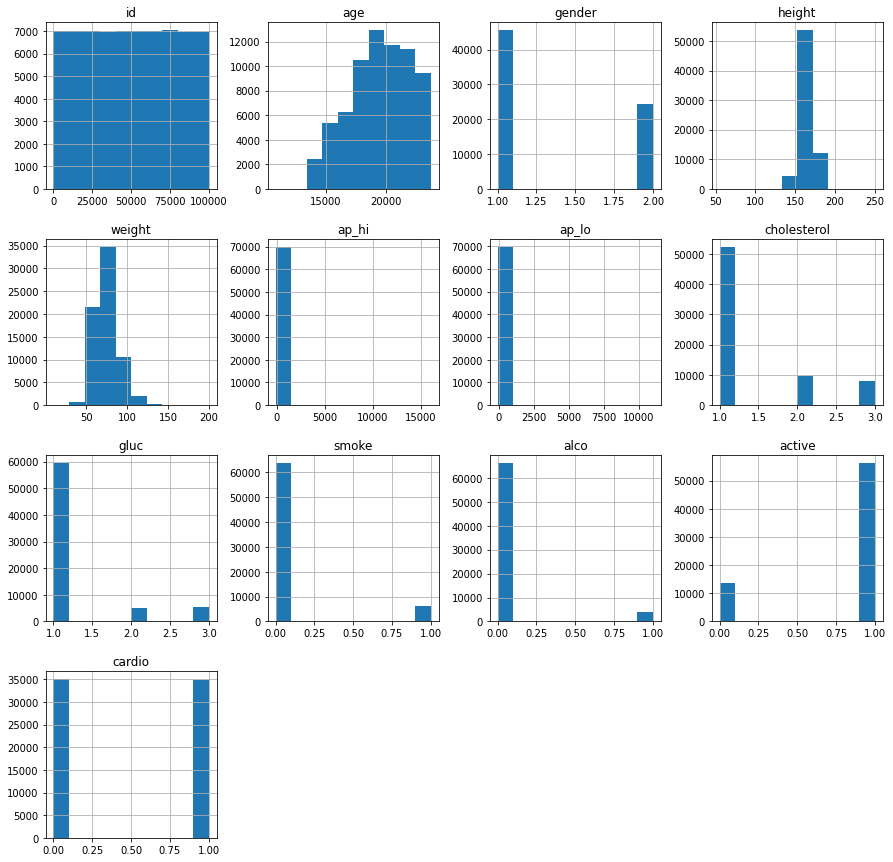

In [76]:
df_train.hist(figsize=(15,15))
plt.show()

**Признаки**
- id — индекс пациента
- age — возраст пациента
- gender — пол пациента
- height — рост пациента, см
- weight — вес пациента, кг
- ap_hi — систолическое давление(верхнее)
- ap_lo — диастолическое давление(нижнее)
- cholesterol — уровень холестерина
- gluc — уровень глюкозы
- smoke — курящий пациент
- alco — отношение к алкоголю у пациента
- active — физическая активность пациента

**Целевой признак**
- Cardio — risk of heart diseases

Удалим столбцы, которые не имеют для нас значимости. Это ID пациентов.

In [77]:
for_drop = ['id']
df_train = df_train.drop(for_drop, axis=1)
df_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [78]:
for_drop = ['id']
df_test = df_test.drop(for_drop, axis=1)
df_test.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18888,1,154,85.0,130,80,1,1,0,0,1
1,19042,2,170,69.0,130,90,1,1,0,0,1
2,20432,1,160,70.0,120,75,1,1,0,0,0
3,18133,2,185,94.0,130,90,1,1,0,0,1
4,16093,2,170,76.0,120,80,1,1,0,0,1


In [79]:
df_train[['weight']] = df_train[['weight']].astype('int64')

Попробуем обучить модели на минимально предобработанных данных и оценим результаты.

******Обучение моделей******

In [80]:
features = df_train.drop('cardio',axis = 1)
target = df_train['cardio']
#features_valid = valid.drop('cardio',axis = 1)
#target_valid = valid['cardio']

Дерево решений

In [81]:
DT = DecisionTreeClassifier()
param_grid = { 
    'max_features': ['log2'],
    'max_depth' : [5,7,9,11,13,15],
    'criterion' : ['gini']
}
CV_DT = GridSearchCV(estimator=DT, param_grid=param_grid, scoring='f1', cv=5)
CV_DT.fit(features, target)
pred_DT = CV_DT.best_estimator_.predict(df_test)

Рандомный лес

In [82]:
RF = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10, 15, 20, 33, 45, 50, 56],
    'max_depth' : [5, 7, 9, 10, 11,13,15],
    'criterion' : ['gini']
}
CV_RF = GridSearchCV(estimator=RF, param_grid=param_grid, scoring='f1', cv=3)
CV_RF.fit(features,target)
pred_RF = CV_RF.predict(df_test)

Логистическая регрессия

In [83]:
LR = LogisticRegression(random_state = 12345)
LR.fit(features, target)
pred_LR = LR.predict(features)


In [84]:
#test = pd.read_csv('test.csv')
#test['cardio'] = pred_RF
#test = test[['id', 'cardio']]
#test.to_csv('Kaggle2.csv', index = 0)

In [85]:
#ks = pd.read_csv('Kaggle2.csv')

In [86]:
#ks.head()

In [87]:
#kd = pd.read_csv('sample_submission.csv')

In [88]:
#kd.head()

In [89]:
t = pd.read_csv('sample_submission.csv')
t['cardio'] = pred_RF
t = t[['id', 'cardio']]
t.to_csv('Kaggle5.csv', index = 0)

In [90]:
tt = pd.read_csv('Kaggle5.csv')

In [91]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      30000 non-null  int64
 1   cardio  30000 non-null  int64
dtypes: int64(2)
memory usage: 468.9 KB


In [92]:
tt.head()

,id,cardio
0,5,1
1,6,1
2,7,0
3,10,1
4,11,0


**Сохраним модель для Streamlit**

In [93]:
from pickle import dump, load
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

In [94]:
rs = RobustScaler()
lr = LogisticRegression

In [95]:
df_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0


In [96]:
df_train_trans = rs.fit_transform(df_train)

In [97]:
pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('logreg', LogisticRegression(verbose=0))
])

In [98]:
pipe.fit(features, target)

Pipeline(steps=[('scaler', RobustScaler()), ('logreg', LogisticRegression())])

In [99]:
pred_lr = pipe.predict_proba(df_test)

In [100]:
with open ('best_model.pcl', 'wb') as fid:
    dump(pipe, fid)